# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from google.colab import drive

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
#Type your code here
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/MSIB/Dataset_inisiasi.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,Cluster
0,2014.0,1.0,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF,0.0
1,2014.0,1.0,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF,0.0
2,2014.0,1.0,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF,0.0
3,2014.0,1.0,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF,0.0
4,2014.0,1.0,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37570 entries, 0 to 37569
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37151 non-null  float64
 1   month               37151 non-null  float64
 2   duoarea             37570 non-null  object 
 3   area-name           37151 non-null  object 
 4   product             37570 non-null  object 
 5   product-name        37151 non-null  object 
 6   process             37570 non-null  object 
 7   process-name        37570 non-null  object 
 8   series              37570 non-null  object 
 9   series-description  37570 non-null  object 
 10  value               37151 non-null  float64
 11  units               37570 non-null  object 
 12  Cluster             37151 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.7+ MB


In [4]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  120


In [5]:
# Menangani Data yang Hilang
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

Jumlah missing values per kolom:
year                  419
month                 419
duoarea                 0
area-name             419
product                 0
product-name          419
process                 0
process-name            0
series                  0
series-description      0
value                 419
units                   0
Cluster               419
dtype: int64


In [6]:
# Handling missing data
# Impute missing values for numerical columns with median
df['year'].fillna(df['year'].median(), inplace=True)
df['month'].fillna(df['month'].median(), inplace=True)
df['area-name'].fillna(df['area-name'].mode()[0], inplace=True)
df['product-name'].fillna(df['product-name'].mode()[0], inplace=True)
df['value'].fillna(df['value'].median(), inplace=True)
df['Cluster'].dropna(inplace=True)  # Drop rows with missing target variable

# Handling duplicates
df.drop_duplicates(inplace=True)

# Verifying after handling missing values and duplicates
df.isnull().sum(), df.duplicated().sum()  # Checking if missing values and duplicates are handled

<ipython-input-6-294a10eb727d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)
<ipython-input-6-294a10eb727d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

(year                    0
 month                   0
 duoarea                 0
 area-name               0
 product                 0
 product-name            0
 process                 0
 process-name            0
 series                  0
 series-description      0
 value                   0
 units                   0
 Cluster               309
 dtype: int64,
 np.int64(0))

In [8]:
df.dropna(subset=['Cluster'], inplace=True)

df.isnull().sum(), df.duplicated().sum()

(year                  0
 month                 0
 duoarea               0
 area-name             0
 product               0
 product-name          0
 process               0
 process-name          0
 series                0
 series-description    0
 value                 0
 units                 0
 Cluster               0
 dtype: int64,
 np.int64(0))

In [9]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
X = df.drop(columns=['Cluster'])
y = df['Cluster']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
# Membuat label encoder
encoder = LabelEncoder()


for column in X_train.columns:
    if X_train[column].dtype == 'object':
        encoder.fit(X_train[column])
        X_train[column] = encoder.transform(X_train[column])
        X_test[column] = encoder.transform(X_test[column])

In [12]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Prediksi untuk random forest
y_pred_rf = model_rf.predict(X_test)

In [14]:
# Logistic Regression Classifier
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [15]:
# Prediksi untuk Logistic Regression
y_pred_lr = model_lr.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

1. Random Forest Classifier
  Random Forest adalah algoritma ensemble learning yang menggabungkan beberapa decision trees untuk membuat keputusan. Tujuannya adalah untuk meningkatkan akurasi dan mengurangi overfitting yang sering terjadi pada decision tree tunggal. Random Forest bekerja dengan membangun banyak pohon keputusan, masing-masing dengan subset data yang diambil secara acak, dan kemudian mengambil suara mayoritas  dari pohon-pohon tersebut untuk membuat prediksi. Proses dari algoritma ini yaitu:
  - Data Splitting, membagi data menjadi subsset yang lebih kecil untuk masing-masing decision tree dalam random forest.
  - Melatih model dengan menggunakan data latih yang telah di encode.
  - Memprediksi hasil uji data.
  - Mengevaluasi hasil prediksi dengan metrik seperti accuracy dan F1-score.

2. Logistic Regression Classifier
  Logistic Regression adalah model linear yang digunakan untuk klasifikasi biner atau multi-kelas. Algoritma ini merupakan model klasifikasi yang mengestimasi probabilitas suatu kelas dengan menggunakan fungsi logistik (sigmoid) untuk memetakan hasil regresi linier ke rentang 0-1. Proses dari algoritma ini yaitu:
  - Modeling, yaitu model mempelajari hubungan antara fitur-fitur input dan kelas target dengan menghitung bobot untuk setiap fitur melalui optimasi menggunakan algoritma gradient descent.
  - setelah dilatih menghasilkan probabilitas dari setiap kelas target untuk prediksi.
  - Decision Boundary, kelas diprediksi berdasarkan probabilitas yang dihitung, dan klasifikasi dilakukan dengan menentukan batas keputusan (threshold) pada 0.5.
  - Mnegevaluasis model dengan metrik seperti accuracy dan F1-score.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [16]:
# Evaluasi Model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [17]:
# Evaluasi Model Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [18]:
# Evaluasi Model Klasifikasi
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

print(f"\nLogistic Regression - Accuracy: {accuracy_lr:.4f}, F1-Score: {f1_lr:.4f}")
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_lr)

Random Forest - Accuracy: 0.9997, F1-Score: 0.9997
Confusion Matrix (Random Forest):
 [[7100    0]
 [   2  327]]

Logistic Regression - Accuracy: 0.9999, F1-Score: 0.9999
Confusion Matrix (Logistic Regression):
 [[7100    0]
 [   1  328]]


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

1. Random Forest
  Model ini menghasilkan Accuracy mencapai 99,97% pada data uji. Hal ini menunjukkan bahwa model dapat memprediksi dengan sangat akurat pada sebagian besar kasus. Model ini juga menghasilkan F1-score mencapai 99,97%, ini score yang sangat tinggi. Hal ini menunjukkan bahwa model sangat baik dalam mengimbangi precission dan recall dengan sedikit kesalahan pada prediksi.
  Confunsion Matrix pada algoritma ini yaitu:
  - True Positives (TP): 327
  - True Negatives (TN): 7100
  - False Positives (FP): 0
  - False Negatives (FN): 2
  Model Random Forest memiliki 0 False Positives dan 2 False Negatives, yang menunjukkan bahwa model sangat jarang membuat kesalahan dalam mengklasifikasikan data, meskipun masih ada sedikit kesalahan dalam memprediksi kelas positif (False Negatives).

2. Logistic Regression
  Model ini menghasilkan Accuracy mencapai 99,99% pada data uji. Hal ini menunjukkan bahwa model mampu memprediksi hampir semua data benar. Model ini juga menghasilkan F1-score mencapai 99,99%, ini score yang lebih tinggi daripada Random Forest. Hal ini menunjukkan sedikit peningkatan dalam keseimbangan antara precision dan recall.
  Confunsion Matrix pada algoritma ini yaitu:
  - True Positives (TP): 328
  - True Negatives (TN): 7100
  - False Positives (FP): 0
  - False Negatives (FN): 1
  Model Logistic Regression juga tidak memiliki False Positives, dan hanya ada 1 False Negative. Ini menunjukkan bahwa model lebih presisi dalam mengidentifikasi kelas positif, meskipun ada sedikit lebih banyak kesalahan (False Negative) dibandingkan Random Forest.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
# Tuning Model untuk Random Forest menggunakan GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [20]:
# Tuning Model untuk Logistic Regression menggunakan GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Evaluasi tuned model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluatsi tuned model Random Forest
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

print(f"\nTuned Random Forest - Accuracy: {accuracy_best_rf:.4f}, F1-Score: {f1_best_rf:.4f}")
print("Confusion Matrix (Tuned Random Forest):\n", conf_matrix_best_rf)


Tuned Random Forest - Accuracy: 0.9997, F1-Score: 0.9997
Confusion Matrix (Tuned Random Forest):
 [[7100    0]
 [   2  327]]


In [22]:
# Evaluasi tuned Logistic Regression model
best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)

# Evaluasi tuned Logistic Regression model
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
f1_best_lr = f1_score(y_test, y_pred_best_lr, average='weighted')
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)

print(f"\nTuned Logistic Regression - Accuracy: {accuracy_best_lr:.4f}, F1-Score: {f1_best_lr:.4f}")
print("Confusion Matrix (Tuned Logistic Regression):\n", conf_matrix_best_lr)



Tuned Logistic Regression - Accuracy: 0.9997, F1-Score: 0.9997
Confusion Matrix (Tuned Logistic Regression):
 [[7100    0]
 [   2  327]]


In [23]:
# Evaluasi Model Setelah Tuning (membandingkan antara kedua algoritma setelah tuning)
print(f"\nRandom Forest (Tuned) - Accuracy: {accuracy_best_rf:.4f}, F1-Score: {f1_best_rf:.4f}")
print("Confusion Matrix (Random Forest Tuned):\n", conf_matrix_best_rf)



Random Forest (Tuned) - Accuracy: 0.9997, F1-Score: 0.9997
Confusion Matrix (Random Forest Tuned):
 [[7100    0]
 [   2  327]]


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Random Forest Precision per Class: [0.99971839 1.        ]
Random Forest Recall per Class: [1.         0.99392097]

Logistic Regression Precision per Class: [0.99985917 1.        ]
Logistic Regression Recall per Class: [1.         0.99696049]


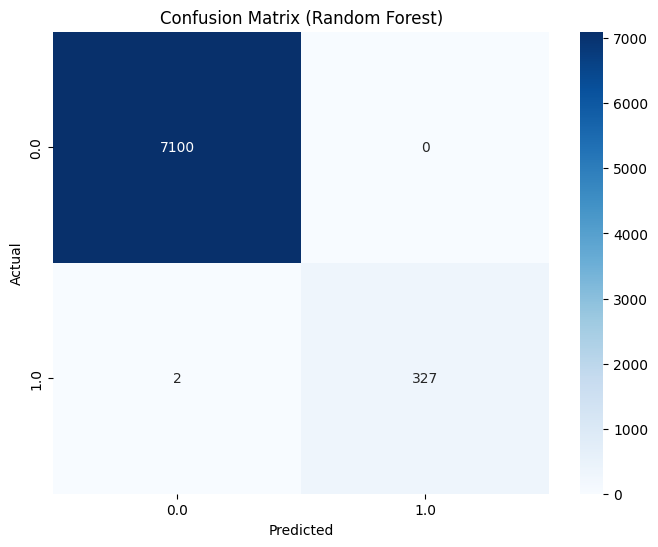

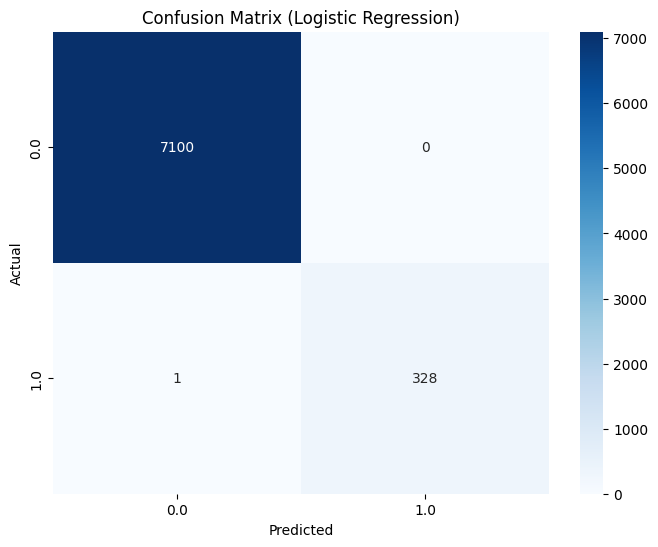

In [24]:
# Precision dan Recall untuk Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)

print("Random Forest Precision per Class:", precision_rf)
print("Random Forest Recall per Class:", recall_rf)

# Precision dan Recall untuk Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr, average=None)
recall_lr = recall_score(y_test, y_pred_lr, average=None)

print("\nLogistic Regression Precision per Class:", precision_lr)
print("Logistic Regression Recall per Class:", recall_lr)

# 2. Confusion Matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. Confusion Matrix untuk Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. Analisis  hasil evaluasi sebelum dan setelah tuning
  - Sebelum tuning, Accuracy pada model Random Forest menunjukkan score sebesar 99,97% yang berarti model ini memprediksi dengan benar hampir seluruh data uji. Ini menunjukkan bahwa model mampu menangani data dengan baik tanpa banyak kesalahan. Lalu untuk Nilai F1-Score sebesar 99,97% menunjukkan bahwa model ini sangat baik dalam mengimbangi precision dan recall, yaitu model tidak hanya akurat dalam memprediksi, tetapi juga efektif dalam mendeteksi kelas positif tanpa menghasilkan banyak prediksi salah. Setelah tuning, Accuracy dan F1-Score tetap 99,97% yang menunjukkan bahwa tuning tidak membawa perubahan signifikan dalam performa model. Confusion Matrix juga menunjukkan hasil yang tetap. Meskipun tuning dilakukan untuk meningkatkan performa, model Random Forest tidak menunjukkan peningkatan yang signifikan, yang dapat disebabkan oleh model yang sudah optimal sebelum tuning. Random Forest bekerja dengan baik sejak awal, karena memiliki kemampuan untuk menangani data yang besar dan kompleks dengan banyak fitur yang berinteraksi. Dalam hal ini, tuning mungkin tidak diperlukan karena model sudah cukup efektif pada parameter default.

  - Sebelum tuning, Logistic Regression menunjukkan performa sangat baik dengan akurasi sebesar 99,99% yang berarti model memprediksi hampir seluruh data uji dengan benar. Nilai F1-Scorenya dengan sebesar 99,99% yang menunjukkan keseimbangan yang sangat baik antara precision dan recall. Setelah tuning Accuracy menurun sedikit menjadi 99,97%, dan F1-Score juga menurun sedikit menjadi 99,97%. Confusion Matrix juga menunjukkan sedikit perubahan, yaitu True Positives (TP): 327, True Negatives (TN): 7100, False Positives (FP): 0, False Negatives (FN): 2. Meskipun ada sedikit penurunan dalam False Negatives, ini menunjukkan bahwa tuning Logistic Regression menyebabkan model menjadi lebih konservatif dalam mendeteksi kelas positif, yang mungkin mengurangi kemampuan untuk mendeteksi sebagian kecil dari kelas positif yang sebenarnya. Setelah hyperparameter tuning, terjadi sedikit penurunan dalam accuracy dan F1-Score, serta peningkatan False Negatives. Tuning ini mungkin bertujuan untuk menghindari overfitting dan membuat model lebih generalizable, tetapi juga mengorbankan sedikit performa dalam mendeteksi kelas positif.



2. Identifikasi kelemahan model
  - Precision dan Recall untuk Setiap Kelas
    - Untuk Random Forest, precision tiap kelas yaitu kelas 0: 0.9997 dan kelas 1: 1.000. Precision untuk kelas 1 adalah sempurna (1.0000), yang berarti model tidak membuat False Positives pada kelas ini. Precision untuk kelas 0 juga sangat tinggi (0.9997), tetapi sedikit lebih rendah daripada kelas 1. Selanjutnya recall setiap kelas yaitu, kelass 0: 1.0000 dan kelas 1: 0.9939. Recall untuk kelas 0 adalah 1.0000, yang menunjukkan bahwa model sangat baik dalam mendeteksi kelas ini. Namun, Recall untuk kelas 1 sedikit lebih rendah (0.9939), menunjukkan bahwa ada beberapa False Negatives di kelas ini, meskipun sangat sedikit.
    - Untuk Logitic Regression, precision tiap kelas yaitu, kela 0: 0.9999 dan kelas 1: 1.000. Precision untuk kelas 1 adalah sempurna (1.0000), yang berarti tidak ada False Positives pada kelas ini. Precision untuk kelas 0 (0.9999) sedikit lebih rendah, tetapi sangat baik. Untuk recall setiap kelas yaitu kelas 0: 1.000 dan kelas 1: 0.9970. Recall untuk kelas 0 adalah 1.0000, sangat baik dalam mendeteksi kelas ini. Namun, Recall untuk kelas 1 (0.9970) sedikit lebih rendah, menunjukkan bahwa model lebih cenderung gagal mendeteksi kelas 1 dibandingkan kelas 0.

  - Identifikasi Kelemahan Model
    - **Random Forest**. Recall untuk Kelas 1 sedikit lebih rendah (0.9939). Ini menunjukkan bahwa model Random Forest mengalami sedikit kesulitan dalam mendeteksi beberapa contoh dari kelas 1, meskipun ini sangat sedikit. Precision untuk Kelas 0 sedikit lebih rendah (0.9997) dibandingkan dengan kelas 1. Meskipun sangat baik, ini bisa menunjukkan bahwa model memiliki sedikit kesalahan dalam mengklasifikasikan kelas negatif (kelas 0).
    - **Logistic Regresssion**. Recall untuk Kelas 1 (0.9970) sedikit lebih rendah dibandingkan Random Forest (0.9939), yang menunjukkan bahwa model Logistic Regression sedikit lebih cenderung terlewatkan dalam mendeteksi kelas positif (kelas 1) dibandingkan dengan Random Forest. Precision untuk Kelas 0 (0.9999) sedikit lebih tinggi dibandingkan dengan Random Forest, tetapi Recall untuk kelas 1 lebih rendah, yang mungkin disebabkan oleh kurangnya kemampuan model dalam mendeteksi kelas 1 secara lebih konsisten.

  - Analisis apakah Overfitting atau Underfitting
    - **Random Forest**. Tidak ada tanda-tanda overfitting yang signifikan di model ini, meskipun Recall untuk Kelas 1 sedikit lebih rendah daripada kelas 0, ini bukan indikasi kuat dari overfitting. Akurasi tinggi dan hasil yang baik pada kedua kelas menunjukkan bahwa model sudah belajar pola yang baik tanpa mempelajari noise dalam data latih. Selanjutnya tidak ada indikasi underfitting. Accuracy dan F1-Score sangat tinggi, dan Precision serta Recall menunjukkan performa yang baik di kedua kelas. Ini menunjukkan bahwa model dapat menangkap pola dengan baik.
    - **Logistic Regression**. Sepertinya model ini tidak mengalami overfitting karena meskipun Recall untuk Kelas 1 sedikit lebih rendah, Akurasi tetap sangat tinggi dan konsisten dengan Random Forest. Recall untuk kelas 0 menunjukkan bahwa model dapat generalize dengan baik.  Tidak ada indikasi underfitting pada Logistic Regression juga. Namun, Recall untuk Kelas 1 lebih rendah daripada Random Forest, yang menunjukkan bahwa model mungkin tidak cukup kompleks untuk menangkap hubungan yang lebih halus di antara fitur dan kelas target, meskipun performa tetap sangat baik.


3. Rekomendasi dari hasil evaluasi ini yaitu:
  - Meningkatkan Recall untuk Kelas Positif (Kelas 1). Random Forest dan Logistic Regression memiliki recall yang sedikit lebih rendah untuk kelas 1. Beberapa tindakan yang bisa dilakukan yaitu penggunaan Classss Weighthing untuk memberi bobot lebih pada kelas positif (kelas 1), sehingga model lebih fokus mendeteksi kelas tersebut dan Resampling dengan menggunakan teknik oversampling untuk kelas 1 atau undersampling untuk kelas 0 untuk mengatasi ketidakseimbangan data, jika itu memang ada dalam dataset.
  - Pengumpulan Data Tambahan. Menambah data untuk kelas positif (kelas 1) akan membantu model lebih terlatih dalam mendeteksi pola di kelas tersebut. Jika menambah data sulit dilakukan, Anda bisa menggunakan teknik SMOTE (Synthetic Minority Over-sampling Technique) untuk menghasilkan contoh data sintetis untuk kelas positif.
  - Mencoba Algoritma lain untuk mencoba mengevaluasi agar bisa mendapatkan nilai yang lebih optimal.
  - Melakukan hyperparameter tuning lanjutan.
  - Penggunaan ensemble methods seperti menggabungkan Random Forest dan Logistic Regression menggunakan teknik ensemble, seperti voting classifier, yang menggabungkan prediksi dari kedua model untuk meningkatkan robustness dan akurasi.
